In [1]:
import anndata
import pandas as pd
import scanpy as sc
import sklearn
import statsmodels.api as sm
import numpy as np
import math
import anndata as ad

annData = sc.read_h5ad("PapalexiSatija2021_eccite_RNA.h5ad")
#this experiment focuses on the JAK-STAT pathway

In [2]:
annData.var

,ensembl_id,ncounts,ncells
gene_symbol,,,
AL627309.1,AL627309.1,244.0,241
AP006222.2,AP006222.2,1252.0,1194
RP4-669L17.10,RP4-669L17.10,90.0,88
RP11-206L10.3,RP11-206L10.3,254.0,251
RP11-206L10.2,RP11-206L10.2,549.0,535
...,...,...,...
L3MBTL4,ENSG00000154655,4.0,4
CTB-31O20.9,CTB-31O20.9,6.0,6
AC092295.4,AC092295.4,6.0,6


In [3]:
annData.obs

,hto,guide_id,hto_barcode,gdo_barcode,perturbation,tissue_type,cell_line,cancer,disease,perturbation_type,celltype,organism,nperts,ngenes,ncounts,percent_mito,percent_ribo
AAACCTGAGCCAGAAC,rep1-tx,STAT2g2,AGGACCATCCAA,CTTCGTGTACGGTTGCACA,STAT2g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3942,17207.0,2.295577,14.714942
AAACCTGAGTGGACGT,rep1-tx,CAV1g4,AGGACCATCCAA,GTCTACGTATTTGCCCCCA,CAV1g4,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2948,9506.0,4.512939,9.877972
AAACCTGCATGAGCGA,rep1-tx,STAT1g2,AGGACCATCCAA,CATCCTTTGGTACAACATG,STAT1g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4258,15256.0,4.116413,13.227583
AAACCTGTCTTGTCAT,rep1-tx,CD86g1,AGGACCATCCAA,ATTCCTTGGATTACAGCTG,CD86g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,1780,5135.0,5.491723,21.888997
AAACGGGAGAACAACT,rep1-tx,IRF7g2,AGGACCATCCAA,CCAGTACACCTTGCACTTG,IRF7g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,2671,9673.0,3.359868,13.263724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTCACTTCC,rep3-tx,CMTM6g1,AGGACCATCCAA,CGTAGTGGGGCTGTACACC,CMTM6g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4884,20863.0,5.469012,13.914586
TTTGTCAGTGACGGTA,rep4-tx,NTg4,TCGATAATGCGA,TGCGACGCTTAGCCTCCGT,control,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,0,3787,17553.0,2.159175,7.673902
TTTGTCAGTTCCACAA,rep3-tx,ATF2g1,AGGACCATCCAA,TTCATTTCTCAGCAGGGTG,ATF2g1,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,4185,15106.0,2.661194,14.338673
TTTGTCATCACGCATA,rep3-tx,CAV1g2,AGGACCATCCAA,GTCATCGTTGAGGTGTTTA,CAV1g2,cell_line,THP-1,True,acute monocytic leukemia,CRISPR,monocytes,human,1,3204,11209.0,7.369078,10.036578


control     2386
IFNGR2g1     579
ATF2g1       500
IFNGR1g3     416
CD86g1       401
            ... 
CUL3g3        15
SPI1g1        14
SPI1g2        10
SPI1g4         7
MYCg4          1
Name: perturbation, Length: 99, dtype: int64


(array([ 2386.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 18343.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

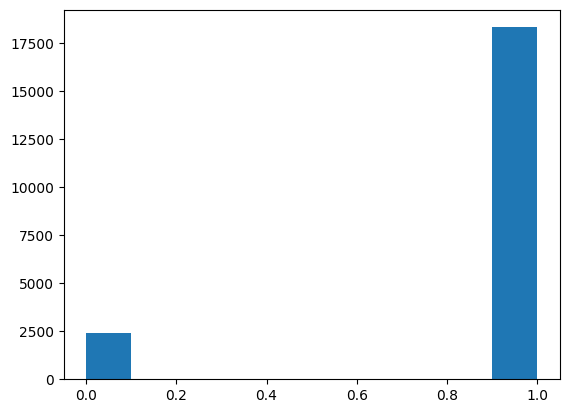

In [4]:
perturb_labels_count = annData.obs['perturbation'].value_counts()
print(perturb_labels_count)

import matplotlib.pyplot as plt
plt.hist( annData.obs['nperts'])

In [5]:
annData.X.todense()
#convert the sparse matrix into a dense one
X=pd.DataFrame(annData.X.todense()) 
#obtain the data frame
cell_name=annData.obs.index
chr_name=annData.var.index
X.index=cell_name
X.columns=chr_name
X=X.T #let the rows represent gene symbol and the columns represent cell with a barcode
print(X)

               AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                           
AL627309.1                  0.0               0.0               0.0   
AP006222.2                  0.0               0.0               0.0   
RP4-669L17.10               0.0               0.0               0.0   
RP11-206L10.3               0.0               0.0               0.0   
RP11-206L10.2               0.0               0.0               0.0   
...                         ...               ...               ...   
L3MBTL4                     0.0               0.0               0.0   
CTB-31O20.9                 0.0               0.0               0.0   
AC092295.4                  0.0               0.0               0.0   
MYO18B                      0.0               0.0               0.0   
TMPRSS3                     0.0               0.0               0.0   

               AAACCTGTCTTGTCAT  AAACGGGAGAACAACT  AAACGGGAGACAGAGA  \
gene_

the proportion of genes which express in 0 % to 10 % cells is 55.64909646629847 %
the proportion of genes which express in 10 % to 20 % cells is 13.217866909753875 %
the proportion of genes which express in 20 % to 30 % cells is 8.767226124725186 %
the proportion of genes which express in 30 % to 40 % cells is 6.053943911201673 %
the proportion of genes which express in 40 % to 50 % cells is 4.472089656281838 %
the proportion of genes which express in 50 % to 60 % cells is 3.3299372620515846 %
the proportion of genes which express in 60 % to 70 % cells is 2.734731084776664 %
the proportion of genes which express in 70 % to 80 % cells is 2.0001072443562657 %
the proportion of genes which express in 80 % to 90 % cells is 1.646200868679286 %
the proportion of genes which express in 90 % to 100 % cells is 2.1288004718751674 %


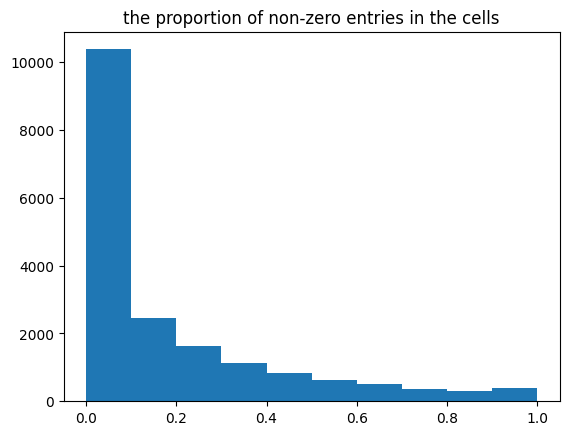

In [9]:
sums = (X == 0).astype(int).sum(axis=1)
zero_proportion = 1-sums/X.shape[1]
plt.hist(zero_proportion)
plt.title("the proportion of non-zero entries in the cells")
#plt.savefig("the proportion of non-zero entries in the cells")
for i in range(1,11):
    count = sum(1 for num in zero_proportion if (i-1)/10 <= num <= i/10)/X.shape[0]
    print("the proportion of genes which express in", (i-1)*10,"% to", i*10,"%","cells is", count*100, "%")

In [10]:
subset = ['EGF', 'PDGFA', 'JAK2', 'GRB2', 'SOS1', 'HRAS', 'RAF1', 
'STAT1', 'STAT3', 'BCL2', 'BCL2L1', 'MYC', 'CCND1', 'GFAP']
#this subset is about the genes in the pathway of JAK-STAT
subset = list(set(subset))
sub_df = (X.loc[subset, :])
sub_df.loc['sequencing_depth'] = X.apply(lambda x:x.sum(),axis=0)
print(sub_df)

                  AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                              
CCND1                          1.0               1.0               3.0   
BCL2                           0.0               0.0               0.0   
RAF1                           0.0               0.0               0.0   
BCL2L1                         1.0               0.0               0.0   
GFAP                           0.0               0.0               0.0   
GRB2                           3.0               1.0               2.0   
STAT3                          5.0               2.0               0.0   
PDGFA                         12.0               0.0               2.0   
JAK2                           0.0               2.0               0.0   
EGF                            0.0               0.0               0.0   
HRAS                           0.0               0.0               1.0   
SOS1                           0.0    

In [11]:
#To delete the genes which express in few cells ,firstly compute the number of zeros in each row
sums = (sub_df == 0).astype(int).sum(axis=1)
print(1-sums/sub_df.shape[1])
# acquire the index of the rows need deleting
sums_result = list(sums[sums >sub_df.shape[1]*0.95].index)
#drop these rows
df = sub_df.drop(sums_result, axis=0)
print(df)
cells = df.columns
genes = df.index

gene_symbol
CCND1               0.458585
BCL2                0.087993
RAF1                0.475517
BCL2L1              0.309904
GFAP                0.002364
GRB2                0.946934
STAT3               0.787882
PDGFA               0.227700
JAK2                0.746732
EGF                 0.004728
HRAS                0.302089
SOS1                0.173043
MYC                 0.339187
STAT1               0.967630
sequencing_depth    1.000000
dtype: float64
                  AAACCTGAGCCAGAAC  AAACCTGAGTGGACGT  AAACCTGCATGAGCGA  \
gene_symbol                                                              
CCND1                          1.0               1.0               3.0   
BCL2                           0.0               0.0               0.0   
RAF1                           0.0               0.0               0.0   
BCL2L1                         1.0               0.0               0.0   
GRB2                           3.0               1.0               2.0   
STAT3               

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CCND1   No. Observations:                20729
Model:                            GLM   Df Residuals:                    20728
Model Family:                 Poisson   Df Model:                            0
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31222.
Date:                Thu, 19 Oct 2023   Deviance:                       39116.
Time:                        20:04:58   Pearson chi2:                 4.90e+04
No. Iterations:                     5   Pseudo R-squ. (CS):          -0.003019
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sequencing_depth    -0.0047      0.001  

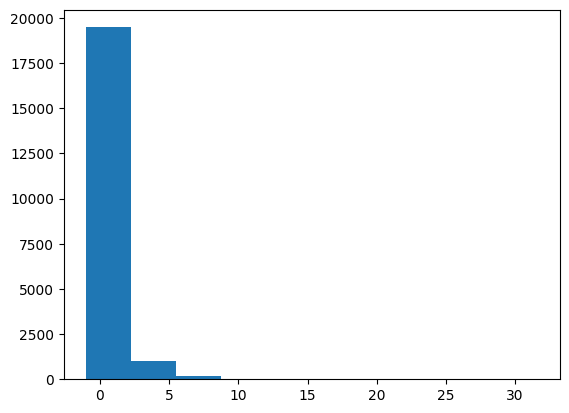

In [12]:
sequencing_depth = (df.loc['sequencing_depth', :])
y = df[0:1]
y = y.T
def func(x):
    return math.log(x)

def func1(x):
    return math.log(x+1)

def func2(x):
    return math.log(x+1.5)

def func3(x):
    return math.sqrt(x+1)+math.sqrt(x)

def func4(x):
    return math.sqrt(x+2)+math.sqrt(x+1)-1

sequencing_depth = pd.DataFrame(sequencing_depth)
x = sequencing_depth.applymap(func)
#x represents the log(sequencing_depth) data
model = sm.GLM(y,x,family=sm.families.Poisson())
#use the log(sequencing_depth) as the intercept of Poisson regression
results = model.fit()
print(results.summary())
resid = results.resid_working
resid = pd.DataFrame(resid)
print(resid)
import matplotlib.pyplot as plt
import numpy as np

plt.hist(resid)
working_residuals = resid
#working_residual is a dataframe storing thr working residual data
working_residuals.columns = [genes[0]]

#perform poisson regression for each gene/protein
for i in range(1,df.shape[0]-1):
    y = df[i:i+1].T
    y = y.applymap(func3)
    model = sm.GLM(y,x,family=sm.families.Poisson())
    results = model.fit()
    #print(results.summary())
    resid=results.resid_working
    resid = pd.DataFrame(resid)
    resid.columns = [genes[i]]
    val = pd.concat([working_residuals,resid],axis = 1)
    working_residuals = val

In [13]:
working_residuals = working_residuals.applymap(func4)
print(working_residuals)

                         CCND1      BCL2      RAF1    BCL2L1      GRB2  \
AAACCTGAGCCAGAAC  1.453827e+00  1.307482  0.957474  1.854605  1.209771   
AAACCTGAGTGGACGT  1.451386e+00  1.313738  0.980363  1.107540  0.986204   
AAACCTGCATGAGCGA  2.806037e+00  1.308749  0.962071  1.093676  1.104400   
AAACCTGTCTTGTCAT  3.312869e+00  1.320263  1.708962  1.915237  1.469233   
AAACGGGAGAACAACT  4.585718e+00  1.313554  0.979683  1.107026  0.984541   
...                        ...       ...       ...       ...       ...   
TTTGTCAGTCACTTCC  0.000000e+00  1.305458  2.264692  2.394967  1.187286   
TTTGTCAGTGACGGTA  2.807128e+00  1.307273  1.626899  1.089600  1.456944   
TTTGTCAGTTCCACAA  1.453291e+00  1.308853  0.962449  1.093964  1.658103   
TTTGTCATCACGCATA  1.053671e-08  1.311998  1.942583  1.102690  1.446991   
TTTGTCATCTGTACGA  0.000000e+00  1.304394  0.946340  1.081679  1.538405   

                     STAT3     PDGFA      JAK2      HRAS      SOS1       MYC  \
AAACCTGAGCCAGAAC  1.827094  3.6

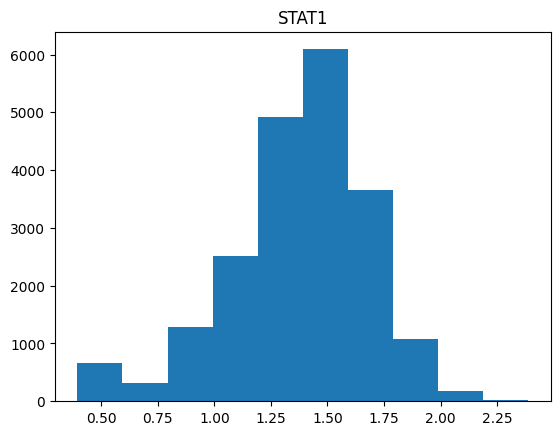

In [32]:
i = 11
plt.hist(working_residuals[genes[i]])
plt.title(genes[i])
plt.savefig(genes[i])

In [11]:
#working_residuals.to_csv('D:/SummerIntern/Datasets/AdamsonWeissman2016_GSM2406675_10X001_working_residuals.csv',sep='\t') 
wr_csv_data = working_residuals.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_RNA_working residuals_exp1.csv', index = True)
print('\nCSV String:\n', wr_csv_data)


CSV String:
 None


In [12]:
Z = pd.DataFrame(annData.obs['perturbation'])

def cut_tail(y):
    return(y[:-2])
    
Z = Z.applymap(cut_tail)
print(Z)
Target_genes = list(Z['perturbation'].unique())
selected_subset = working_residuals.columns
Perturb_subset = list(selected_subset & Target_genes)
print(Perturb_subset)

                 perturbation
AAACCTGAGCCAGAAC        STAT2
AAACCTGAGTGGACGT         CAV1
AAACCTGCATGAGCGA        STAT1
AAACCTGTCTTGTCAT         CD86
AAACGGGAGAACAACT         IRF7
...                       ...
TTTGTCAGTCACTTCC        CMTM6
TTTGTCAGTGACGGTA        contr
TTTGTCAGTTCCACAA         ATF2
TTTGTCATCACGCATA         CAV1
TTTGTCATCTGTACGA        STAT3

[20729 rows x 1 columns]
['JAK2', 'STAT3', 'STAT1', 'MYC']


C:\Users\Eurus2003\AppData\Local\Temp\ipykernel_12388\2377119836.py:10: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  Perturb_subset = list(selected_subset & Target_genes)


In [13]:
wr_csv_data2 = Z.to_csv('D:/SummerIntern/Datasets/PapalexiSatija2021_eccite_RNA_perturbation_information_exp1.csv', index = True)
print('\nCSV String:\n', wr_csv_data2)


CSV String:
 None
